## Stock Price Prediction Using LSTM: Meta Platforms, Inc. (META)

In this project, I explore stock price prediction for **Meta Platforms, Inc. (META)** using **Long Short-Term Memory (LSTM) networks**, a specialized form of recurrent neural networks ideal for time series data. Leveraging historical stock data from **Yahoo Finance**, my goal is to develop a predictive model that captures the intricate patterns of META's stock prices. This approach highlights the synergy between machine learning and financial market analysis, offering insights into the future trends of META's stocks.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yf
yf.pdr_override()

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

### Fetching Stock Data for META
In this section, I specify the company of interest, which is META (Facebook), and define the time period for our analysis, ranging from January 1, 2012, to January 1, 2020. I then use the `pdr.get_data_yahoo` function to retrieve historical stock data for META from Yahoo Finance for this period. This data includes essential information like opening and closing prices, daily highs and lows, and trading volume, which are crucial for our subsequent stock price analysis and prediction tasks. The `print(data)` statement at the end displays the fetched data, giving us an initial view of the dataset we will be working with.



In [9]:
# LOAD DATA
company = 'META'

start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)

data = pdr.get_data_yahoo(company, start, end)
print(data)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18   42.049999   45.000000   38.000000   38.230000   38.230000   
2012-05-21   36.529999   36.660000   33.000000   34.029999   34.029999   
2012-05-22   32.610001   33.590000   30.940001   31.000000   31.000000   
2012-05-23   31.370001   32.500000   31.360001   32.000000   32.000000   
2012-05-24   32.950001   33.209999   31.770000   33.029999   33.029999   
...                ...         ...         ...         ...         ...   
2019-12-24  206.300003  206.789993  205.000000  205.119995  205.119995   
2019-12-26  205.570007  207.820007  205.309998  207.789993  207.789993   
2019-12-27  208.669998  208.929993  206.589996  208.100006  208.100006   
2019-12-30  207.860001  207.899994  203.899994  204.410004  204.410004   
2019-12-31  204.000000  205.559998  203.600

### Data Preparation for LSTM Model
This section is crucial for preparing the stock price data for the LSTM model. First, I use the `MinMaxScaler` to scale the closing prices of the stock into a range between 0 and 1. This normalization is important because LSTM models, like many other neural networks, perform better with data scaled to this range. It helps in reducing the model training time and improves its ability to generalize. 

After scaling, I set up the training data. I shall define `prediction_days` as 60, meaning the model will use the past 60 days of stock prices to predict the next day's price. I then create two lists, `x_train` and `y_train`. `x_train` contains sequences of 60 consecutive days of scaled closing prices, and `y_train` contains the closing price of the stock for the day following each sequence. These lists are converted to NumPy arrays and reshaped to fit the input requirements of the LSTM model. This reshaping is necessary as LSTM models expect input data in a specific format, typically a three-dimensional array of [samples, time steps, features].


In [11]:
# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


### Constructing the LSTM Neural Network
In this part of the process, I construct the LSTM (Long Short-Term Memory) neural network model, which is particularly suited for time series data like stock prices. The model starts with a Sequential layer, indicating that the layers of the network will be arranged in sequence. 

I then add several LSTM layers with 50 units each. The `return_sequences=True` parameter in the first two LSTM layers ensures that the output of these layers includes the sequence information, necessary for stacking LSTM layers. To prevent overfitting, I intersperse Dropout layers with a rate of 0.2, which randomly sets 20% of the input units to zero during training. After the LSTM layers, I add a Dense layer with a single unit, which is used to output the predicted next closing value of the stock. 

Finally, I compile the model using the Adam optimizer and mean squared error as the loss function. The model is then trained on the prepared data (`x_train` and `y_train`) for 25 epochs with a batch size of 32. This training process involves adjusting the model weights to minimize the loss function, effectively teaching the model to predict stock prices based on the input data.


In [12]:
# Build the Neural Network Model
model = Sequential()

model.add(LSTM(units = 50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # To prevent overfitting by randomly setting a fraction of input units to 0
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #Prediction of next closing value by reducing output to a single value

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)



Epoch 1/25

59/59 [==============================] - 8s 43ms/step - loss: 0.0279
Epoch 2/25
59/59 [==============================] - 2s 41ms/step - loss: 0.0053
Epoch 3/25
59/59 [==============================] - 2s 41ms/step - loss: 0.0038
Epoch 4/25
59/59 [==============================] - 2s 40ms/step - loss: 0.0035
Epoch 5/25
59/59 [==============================] - 2s 40ms/step - loss: 0.0039
Epoch 6/25
59/59 [==============================] - 3s 43ms/step - loss: 0.0033
Epoch 7/25
59/59 [==============================] - 3s 46ms/step - loss: 0.0032
Epoch 8/25
59/59 [==============================] - 3s 42ms/step - loss: 0.0038
Epoch 9/25
59/59 [==============================] - 2s 40ms/step - loss: 0.0030
Epoch 10/25
59/59 [==============================] - 2s 40ms/step - loss: 0.0032
Epoch 11/25
59/59 [==============================] - 2s 41ms/step - loss: 0.0033
Epoch 12/25
59/59 [==============================] - 2s 40ms/step - loss: 0.0026
Epoch 13/25
59/59 [===============

### Loading and Preparing Test Data
In this section, I load the test data to evaluate the LSTM model's performance. The test data period starts from January 1, 2020, to the current date. I use the `pdr.get_data_yahoo` function to fetch the stock prices for META during this period, focusing on the closing prices as they are most relevant for the model's predictions.

I then combine the previously loaded training data (`data['Close']`) with the new test data (`test_data['Close']`) into a single dataset. This is necessary to ensure continuity in the stock price data, as the LSTM model requires historical data for making predictions. From this combined dataset, I extract the most recent portion, specifically the last 60 days of the training data plus all of the test data. This extracted data is then reshaped and scaled using the same scaler as the training data. The scaling ensures consistency in data representation, as the model was trained on scaled data. This prepared data (`model_inputs`) is now ready to be used for making predictions with the trained LSTM model.


In [13]:
# Load Test Data
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = pdr.get_data_yahoo(company, test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values  # Select data 60 days before the start of the test data
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

[*********************100%%**********************]  1 of 1 completed


### Generating Predictions from the Test Data
In this part of the process, I generate predictions for the stock prices using the test data. Initially, I create an empty list `x_test` to store the test inputs for the model. For each point in the test data, I collect a sequence of the previous 60 days' worth of data, mirroring the approach used for the training data. This sequence is what the LSTM model will use to make its predictions.

After populating `x_test` with these sequences, I convert it into a NumPy array and reshape it to match the input shape expected by the LSTM model. This reshaping is crucial for the model to correctly interpret the data. Once `x_test` is prepared, I feed it into the trained model to get the predicted stock prices. These predictions are initially in the scaled format, so I use the `scaler.inverse_transform` method to convert them back to their original scale. This step is essential to make the predicted prices comparable to the actual stock prices, allowing for a meaningful evaluation of the model's performance.


In [14]:
# Make Predictions on Test Data

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)




32/32 [==============================] - 1s 13ms/step


### Visualizing Actual vs. Predicted Prices
In this section, I create a visualization to compare the actual and predicted stock prices for META. Using Matplotlib, I plot two lines on the same graph: one representing the actual closing prices of the stock (in black) and the other showing the predicted prices from the LSTM model (in red). 




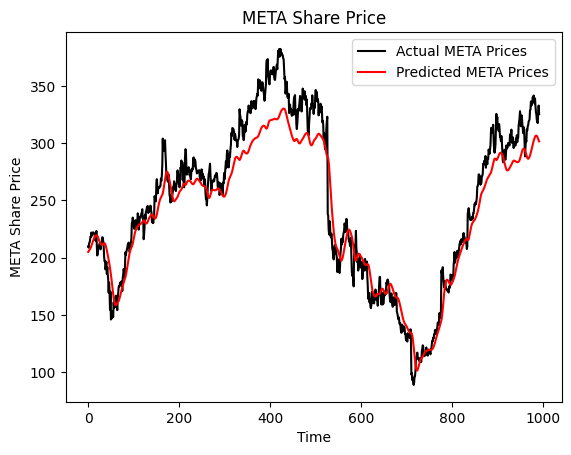

In [15]:
# Visualising Predictions

plt.plot(actual_prices, color = 'black', label =f"Actual {company} Prices")
plt.plot(predicted_prices, color = 'red', label =f"Predicted {company} Prices")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()


### Forecasting the Next Day's Closing Price
In this final step, I focus on predicting the next day's closing stock price for META using the trained LSTM model. To do this, I first select the most recent data from `model_inputs`, specifically the last 60 days' data, which aligns with the model's input structure used during training. This data slice, referred to as `real_data`, is then converted into a NumPy array and reshaped appropriately to match the model's expected input format.

Once `real_data` is prepared, I feed it into the model to get the prediction for the next day's closing price. This prediction is initially in the scaled format, so I apply the `scaler.inverse_transform` method to convert it back to the original scale, making it interpretable in the context of actual stock prices. Finally, I print out the predicted price, providing a clear and direct forecast of what the model expects the stock's next closing price to be. This step demonstrates the practical application of the LSTM model in making short-term predictions, which can be particularly valuable for traders and investors looking to make informed decisions.


In [27]:
# Predicting the Next Day
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1]))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")


1/1 [==============================] - 1s 970ms/step
Prediction: [[300.8541]]


### Limitations of the Stock Price Prediction Model
While the LSTM model provides a sophisticated approach to predicting stock prices, it's important to acknowledge its limitations. First and foremost, stock markets are influenced by a myriad of factors including economic indicators, political events, and market sentiment, which are not captured by historical price data alone. This means that the model, which relies solely on past price trends, might not accurately predict future prices in the face of unforeseen events or changes in market conditions.

Another limitation is the model's reliance on the assumption that past patterns will repeat in the future. While LSTM is adept at identifying and learning from historical patterns, the stock market's inherent volatility and unpredictability can lead to significant deviations from past trends. Additionally, the model's performance is heavily dependent on the chosen parameters and the quality of the data. Overfitting is a common challenge, where the model performs well on training data but poorly on unseen data, reducing its practical applicability.

Lastly, the financial markets are subject to regulatory changes, economic shifts, and technological advancements, all of which can alter market dynamics in ways that the model, trained on historical data, may not anticipate. Therefore, while the LSTM model can be a valuable tool in stock price analysis, its predictions should be used in conjunction with other forms of analysis and market understanding.
